#### Create a 3x3 Matrix

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt    
%matplotlib inline
%run 'add_one.ipynb'
%run 'plot_data.ipynb'

Welcome to new notebook


In [2]:
def warmUpExcercise():
    return np.eye(4)

In [3]:
print('Test Function call')
add_one(5)
print ('Running warmUpExercise \n');
print (warmUpExcercise())

Test Function call
6
Running warmUpExercise 

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


Plotting Data


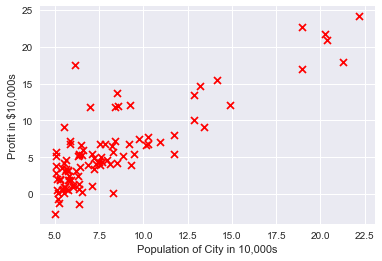

In [4]:
print("Plotting Data")
#data=pd.read_csv('ex1data1.txt',delimiter=',',skipinitialspace=True,header=0,names=['x','y'])
data_x=pd.read_csv('ex1data1.txt',usecols=[0],names='x')
data_y=pd.read_csv('ex1data1.txt',usecols=[1],names='y')
plot_data(data_x,data_y)

In [5]:
#Testing the cost function
print("Testing the cost function")
data_x['X']=np.ones(len(data_y),dtype=int) #Adding a new coloumn X with 1's
cols=['X','x'] #Rearrangeing the column
data_x=data_x[cols]

Testing the cost function


In [62]:
def computeCost(X,y,theta):
    '''where X is a pandas dataframe of input features, plus a column of ones to accommodate theta 0;
    y is a vector that we are trying to predict using these features, and theta is an array of the parameters'''

    m = len(y)
    hypothesis = X.dot(theta)
    a = (hypothesis[0]-y)**2
    J = (1/(2*m)*sum(a))
    return J
    

In [39]:
# Initialize fitting parameters
theta=np.zeros([2,1],dtype=int) #Initailizing the theta values to zero
m=len(data_y) #Number of training examples
#Some gradient descent settings
iterations = 1500;
alpha = 0.01;

J = computeCost(data_x,data_y,theta);

print("With theta = [0 ; 0]\n Cost computed = {0} \n".format(J));
print('Expected cost value (approx) 32.07\n');
# further testing of the cost function
theta1=np.array([-1,2]);
J = computeCost(data_x,data_y,theta1);
print('\nWith theta = [-1 ; 2]\nCost computed = {0}\n'.format (J));
print('Expected cost value (approx) 54.24\n');

With theta = [0 ; 0]
 Cost computed = nan 

Expected cost value (approx) 32.07


With theta = [-1 ; 2]
Cost computed = 29.50291479209485

Expected cost value (approx) 54.24



In [42]:
def gradientDescent(X,y,theta,alpha,num_iters):
    '''Implement the gradient descent algorithm, where alpha is the learning rate and num_iters is the number of iterations to run'''

    #initiate an empty list to store values of cost function after each cycle
    Jhistory = []
    theta_update = theta.copy()

    for num_iter in range(num_iters):
        #these update only once for each iteration
        hypothesis = X.dot(theta_update)
        loss = hypothesis[0]-y

        for i in range(len(X.columns)):
            #these will update once for every parameter
            theta_update[i] = theta_update[i] - (alpha*(1.0/m))*((loss*(X.iloc[:,i])).sum())

        Jhistory.append(costJ(X,y,theta_update))

    return Jhistory, theta_update

In [43]:
print('\nRunning Gradient Descent ...\n')
# run gradient descent
theta = gradientDescent(data_x, data_y, theta, alpha, iterations);

# print theta to screen
print('Theta found by gradient descent:{0}\n'.format(theta));
print('Expected theta values (approx)\n');
print(' -3.6303\n  1.1664\n\n');



Running Gradient Descent ...



/Users/apple/anaconda/lib/python3.6/site-packages/pandas/core/indexes/base.py:2984: RuntimeWarning: '>' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


ValueError: could not broadcast input array from shape (98) into shape (1)

In [63]:
data_x1=np.array([[1,2],[1,4],[1,6]])
data_y1=np.array([2,4,6])
theta=[1,1]
print (computeCost(data_x1,data_y1,theta))

1.83333333333
